## Global Power Plant Database

### Importing Libraries

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import scipy as stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Importing Dataset

In [2]:
# Reading the csv file from dataset
df = pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")
df


,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.tail()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.59665,865.4,686.5,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.5,9.9344,77.4768,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [7]:
df.shape

(907, 27)

Here, we can see that this dataset is comprised of 907 rows and 27 columns including 2 target varibales capacity_mw and primary_fuel(Fuel_Type) where we need work on the prediction of both capacity_mw and Fuel Type.


In [8]:
# Let's define and rename primary_fuel as Fuel_Type to better understand the dataset
df.rename(columns={'primary_fuel':'Fuel_Type'},inplace=True)

In [9]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,Fuel_Type,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


## Exploratory Data Analysis

In [10]:
df.shape

(907, 27)

Here, we have 907 rows and 27 columns


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   Fuel_Type                 907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

Here, we can get information about the dataset which includes indexing, column, no-null values and memory usage.We can clearly see that we have null values and also object datatype, which we will handle seperately by imputer and encoding techniques.

In [15]:
#Let's check the type of the dataset
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
Fuel_Type                    object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

So, we can see that we have object datatype also and we need to encoding for the object data types. So, features that needs encoding are country, country_long, name, gppd_idnr,Fuel_Type,other_fuel1,other_fuel2, owner, source, url, geolocation_source,generation_data_source. Since, these are object data type and we need numberic datatypes for the ML model.

In [16]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
Fuel_Type                     0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

Our data have high number of null values and we need to that this accordingly.

In [14]:
#Now, we are checking the number of unique values in each column
df.nunique()

country                       1
country_long                  1
name                        907
gppd_idnr                   907
capacity_mw                 361
latitude                    836
longitude                   827
Fuel_Type                     8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013           0
generation_gwh_2014         371
generation_gwh_2015         396
generation_gwh_2016         403
generation_gwh_2017         408
generation_gwh_2018         410
generation_gwh_2019           0
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

We have number of unique values present in each column. Here the columns country, country_long, other_fuel2, year_of_capacity_data and generation_data_source have only one unique value. Also other_fuel3, wepp_id,generation_gwh_2013,generation_gwh_2019,estimated_generation_gwh have no unique values which means they are filled with only NAN values. Since these columns have same entries thoughout the dataset so we can drop these columns.



In [18]:
#let's do some feature engineering here.

## Feature Engineering

In [19]:
#Let's check the count of the country
df["country"].value_counts()

IND    907
Name: country, dtype: int64

In [20]:
# Let's check the count of the country_long
df["country_long"].value_counts()

India    907
Name: country_long, dtype: int64

We see that only IND is listed in the country hence there is no impact of these two features on prediction, we can aslo drop the country_long from the column.

In [21]:
df.drop(columns=["country","country_long"],axis=1,inplace=True)

In [ ]:
# removing all the irrelavant columns
df.drop(columns=['other_fuel2','year_of_capacity_data','generation_data_source','other_fuel3','wepp_id','estimated_generation_gwh'],axis=1,inplace=True)


In [23]:
# Checking the count of name
df["name"].value_counts()

CHANDA CEMENT WORKS          1
Gadna 2 Solar Power Plant    1
YELHANKA (DG)                1
KAMALANGA                    1
MEJIA                        1
                            ..
Nallakonda Wind Farm         1
GEPL                         1
BALCO TPP                    1
GAJ                          1
MACHKUND                     1
Name: name, Length: 907, dtype: int64

In [24]:
df["gppd_idnr"].value_counts()

IND0000519    1
WRI1026764    1
IND0000038    1
WRI1026128    1
IND0000326    1
             ..
IND0000035    1
IND0000482    1
IND0000388    1
WRI1026659    1
IND0000361    1
Name: gppd_idnr, Length: 907, dtype: int64

Here, can see that the name column and the gppd_idnr has unique name and the unique ID for power plant, so we can drop these two columns as well.

In [47]:
#Let's drop all the columns which will not impact the prediction

In [48]:
#Dropping the columns that has no impact on the prediction
df.drop("gppd_idnr",axis=1,inplace=True)
df.drop("owner",axis=1,inplace=True)
df.drop("url",axis=1,inplace=True)

In [53]:
df.drop("generation_gwh_2013",axis=1,inplace=True)
df.drop("generation_gwh_2019",axis=1,inplace=True)

In [54]:
df.shape

(907, 13)

In [55]:
# Checking null values again after feature selection
df.isnull().sum()


capacity_mw              0
latitude                46
longitude               46
Fuel_Type                0
other_fuel1            709
commissioning_year     380
source                   0
geolocation_source      19
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

<AxesSubplot:>

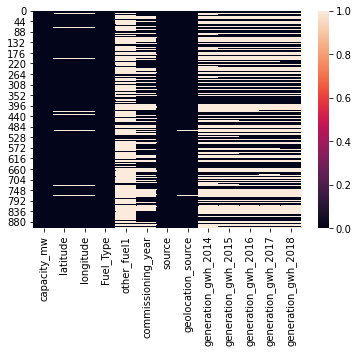

In [56]:
# Let's visualize the null values clearly
sns.heatmap(df.isnull())

Here, we can clearly observe that there are the white lines in the heat map, which indicates that there are missing values in the dataset.



In [57]:
#Let's check the skewness of the dataset
df.skew().sort_values()

commissioning_year    -1.067949
latitude              -0.145866
longitude              1.112646
capacity_mw            3.123576
generation_gwh_2014    3.342707
generation_gwh_2018    3.476298
generation_gwh_2016    3.512370
generation_gwh_2017    3.566070
generation_gwh_2015    3.665904
dtype: float64

## Now we are using imputation techniques to treat the null values.


Since, most of the columns have missing values except the target variables and the feature source.
The columns latitude has numerical data and has no skewness and outliers so we can use mean, mode and median method to fill the outliers.

In [62]:
#checking the mean of latitude
df['latitude'].mean()

21.19791811846691

In [63]:
#checking the mode of other_fuel1 
df["other_fuel1"].mode()

0    Oil
dtype: object

In [64]:
#checking the mode of geolocation_source columns
df["geolocation_source"].mode()

0    WRI
dtype: object

In [66]:
#Filling the null values using mean, mode and median method
df["latitude"] = df["latitude"].fillna(df["latitude"].mean())
df["other_fuel1"] = df["other_fuel1"].fillna(df["other_fuel1"].mode()[0])
df["geolocation_source"] = df["geolocation_source"].fillna(df["geolocation_source"].mode()[0])
df["longitude"] = df["longitude"].fillna(df["longitude"].median())
df["commissioning_year"] = df["commissioning_year"].fillna(df["commissioning_year"].median())
df["generation_gwh_2014"] = df["generation_gwh_2014"].fillna(df["generation_gwh_2014"].median())
df["generation_gwh_2015"] = df["generation_gwh_2015"].fillna(df["generation_gwh_2015"].median())
df["generation_gwh_2016"] = df["generation_gwh_2016"].fillna(df["generation_gwh_2016"].median())
df["generation_gwh_2017"] = df["generation_gwh_2017"].fillna(df["generation_gwh_2017"].median())
df["generation_gwh_2018"] = df["generation_gwh_2018"].fillna(df["generation_gwh_2018"].median())


In [67]:
# let's check the null values if there any
df.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
Fuel_Type              0
other_fuel1            0
commissioning_year     0
source                 0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

We have the clean data now, since we have removed all the null values using imputation method.

<AxesSubplot:>

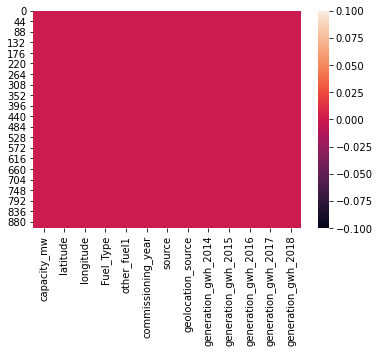

In [68]:
#Now, visualizing the null values clearly
sns.heatmap(df.isnull())

In [69]:
#Getting the columns in the dataset
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'Fuel_Type', 'other_fuel1',
       'commissioning_year', 'source', 'geolocation_source',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

So, these are the columns present in the dataset

In [70]:
# Let's check the list of counts of capacity_mw
df['capacity_mw'].value_counts()

5.0       39
10.0      22
15.0      20
600.0     20
1200.0    19
          ..
192.0      1
27.3       1
26.4       1
68.8       1
19.7       1
Name: capacity_mw, Length: 361, dtype: int64

So, these are unique counts present in capacity_mw columns


In [71]:
# Let's check the list of counts of primary_fuel
df['Fuel_Type'].value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: Fuel_Type, dtype: int64

So, These are th list of the values in the column primary_fuel

In [72]:
# Let's check the uniqueness of primary_fuel
df["Fuel_Type"].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

So, these the unique classes present in the primary_fuel columns.

## Feature Extraction

In [73]:
# Let's check the list of counts of commissioning_year
df['commissioning_year'].value_counts()

2001.0    395
2015.0     28
2013.0     25
2012.0     23
2016.0     19
         ... 
1958.0      1
1949.0      1
1954.0      1
1956.0      1
1927.0      1
Name: commissioning_year, Length: 73, dtype: int64

In [74]:
# Let's extract power plant age from commissioning year by subtracting it from the year 2018
df["Power_plant_age"] = 2018 - df["commissioning_year"]
df.drop(columns=["commissioning_year"], inplace = True)

Here, we have extracted Power plant age from commissioning year and dropped commissioning year columns. From Power plant age we can check how old are the power plants.


In [76]:
#checking the data frame
df.head()

,capacity_mw,latitude,longitude,Fuel_Type,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,2.5,28.1839,73.2407,Solar,Oil,National Renewable Energy Laboratory,National Renewable Energy Laboratory,801.123775,711.181225,737.205450,817.977250,751.644375,7.0
1,98.0,24.7663,74.6090,Coal,Oil,Ultratech Cement ltd,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
2,39.2,21.9038,69.3732,Wind,Oil,CDM,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
3,135.0,23.8712,91.3602,Gas,Oil,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128,14.0
4,1800.0,21.9603,82.4091,Coal,Oil,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,3.0


In [77]:
# Let's check wheather the dataset contains any space
df.loc[df['capacity_mw']==" "]


,capacity_mw,latitude,longitude,Fuel_Type,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age


### Statistical Description of the DataSet

In [78]:
# Statistical summary of dataset
df.describe()

,capacity_mw,latitude,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.197918,77.427103,1516.689956,1510.071296,1565.361383,1657.121797,1665.011030,19.271224
std,590.085456,6.079148,4.815073,2785.604307,2984.994556,3005.087210,3046.862910,3168.826750,13.158621
min,0.000000,8.168900,68.644700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,17.072000,74.388900,801.123775,711.181225,737.205450,817.977250,751.644375,15.000000
50%,59.200000,21.281800,76.719500,801.123775,711.181225,737.205450,817.977250,751.644375,17.000000
75%,385.250000,25.176450,79.206100,801.123775,711.181225,737.205450,817.977250,751.644375,20.000000
max,4760.000000,34.649000,95.408000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,91.000000


Observations

Here we can see the statistical analysis of the dataset which looks perfect as there are no negative or invalid values present here.

There are no missing values in the dataset as the counts of columns are same.

The minimum capacity of the power plant is zero and maximum is 4760 and there is huge difference in mean and standard deviation.

From the difference between maximum and 75% we can infer that there are huge outliers present in most of the columns, will remove them using appropriate methods before building our model.



In [79]:
#Let's check the categorical columns
cat_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        cat_col.append(i)
print(cat_col)

['Fuel_Type', 'other_fuel1', 'source', 'geolocation_source']


In [80]:
#checking the numeric columns for visualization
num_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        num_col.append(i)
print(num_col)

['capacity_mw', 'latitude', 'longitude', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'Power_plant_age']


## Data Visualization

### Univariate Analysis


Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: Fuel_Type, dtype: int64


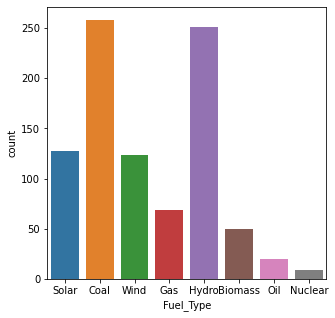

In [81]:
#Plotting categorical columns
#visualizing the fuel types in Fuel_Type
print(df['Fuel_Type'].value_counts())   
plt.figure(figsize=(5,5))
sns.countplot(df['Fuel_Type'])
plt.show()

Here, we can clearly observe that the 'Coal' energy source generates more electricity from all  followed by the 'HydroBiomass'.

Also, Nuclear energy generates very less electricity as compare to other.

Oil             904
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64


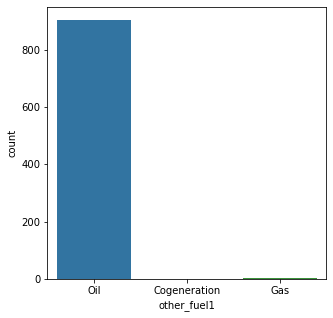

In [82]:
#Let's check the count of fuel1
print(df['other_fuel1'].value_counts())
plt.figure(figsize=(5,5))
sns.countplot(df['other_fuel1'])
plt.show()

In [83]:
#we can observe that there are 3 unique values in other_fuel1 and the count of oil is higher than cogeneration and gas.


WRI                                     784
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64


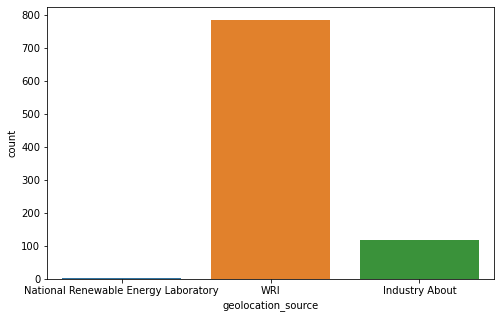

In [84]:
# Visualizing the counts of owner
print(df["geolocation_source"].value_counts())
labels='WRI','Industry About','National Renewable Energy Laboratory'
plt.figure(figsize=(8,5))
sns.countplot(df['geolocation_source'])
plt.show()

In [86]:
#we can observe that WRI has the highest counts, which means that the max information is shared by this source.

5.0       39
10.0      22
15.0      20
600.0     20
1200.0    19
          ..
192.0      1
27.3       1
26.4       1
68.8       1
19.7       1
Name: capacity_mw, Length: 361, dtype: int64


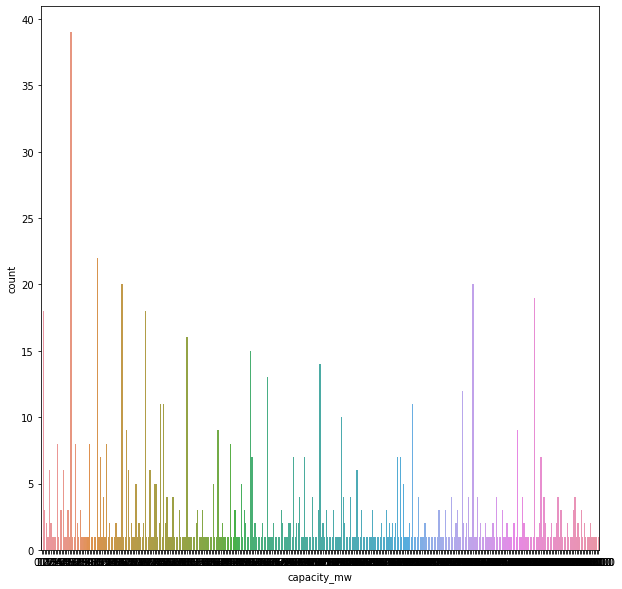

In [87]:
 #visualizing the capacity_mw
print(df['capacity_mw'].value_counts())  
plt.figure(figsize=(10,10))
sns.countplot(df['capacity_mw'])
plt.show()

## Distribution of skewness

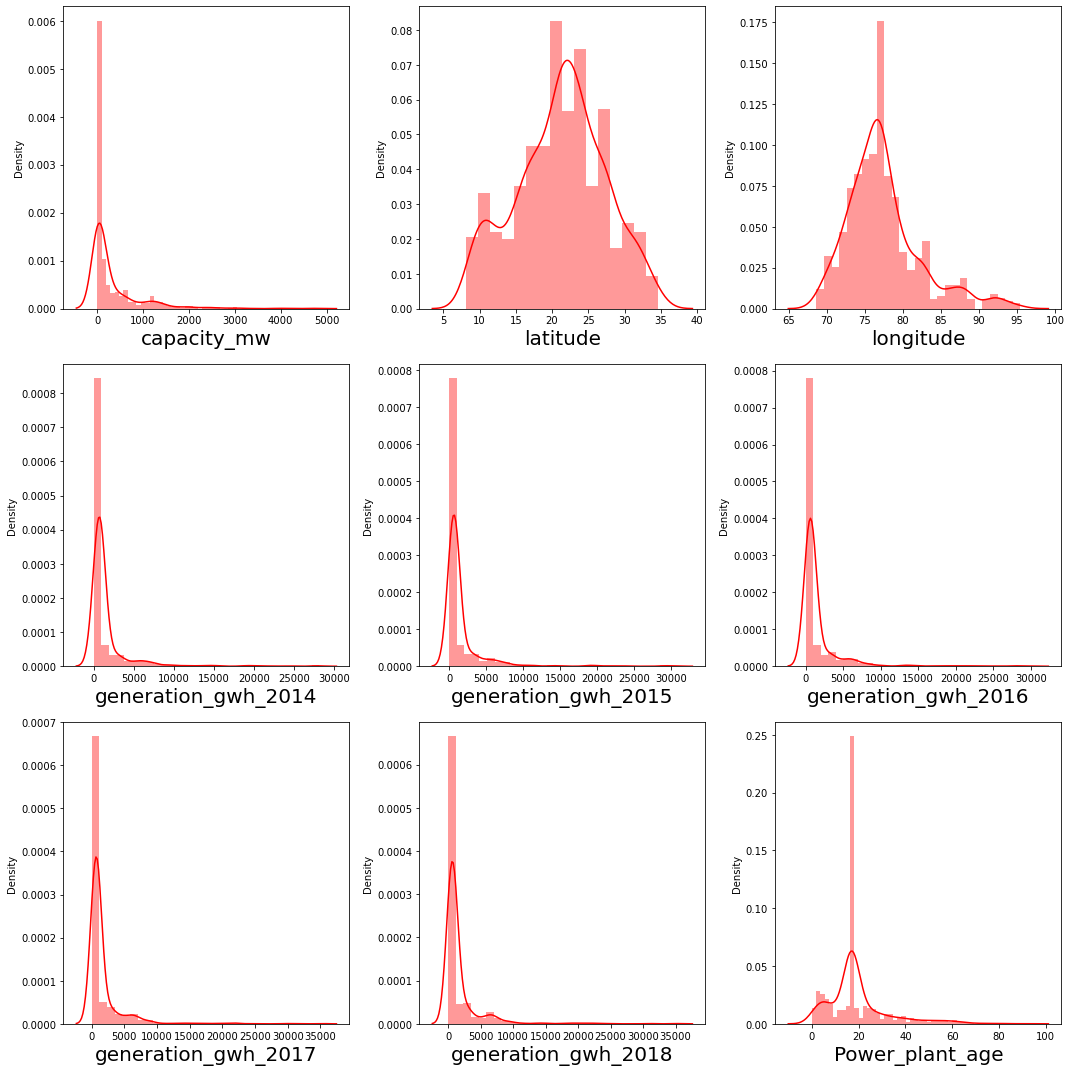

In [89]:
#Plotting Numerical Columns
# checking how the data has been distributed in each column

plt.figure(figsize=(15,15),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column],color='r')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

Obervations

We can observe that the data is not normally distributed in all the columns except latitude and longitude.In most of the columns the mean is greater than the median.

Outliers and skewness is present, which needs to be treated.


### Bivariate Analysis


#### Corealtion between target varibale capacity_mw with features

<AxesSubplot:title={'center':'Comparision between geolocation_source and capacity_mw'}, xlabel='geolocation_source', ylabel='capacity_mw'>

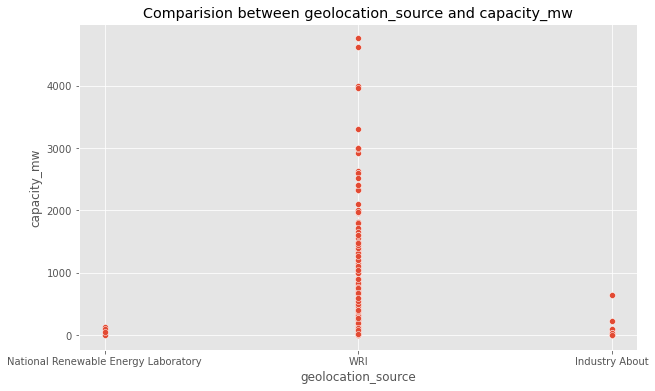

In [90]:
#Let's check the relation between target capacity_mw and variable geolocation source
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between geolocation_source and capacity_mw')
sns.scatterplot(df['geolocation_source'],df["capacity_mw"])


In [91]:
#WRI plays the vital role here

<AxesSubplot:title={'center':'Comparision between Power_plant_age and capacity_mw'}, xlabel='Power_plant_age', ylabel='capacity_mw'>

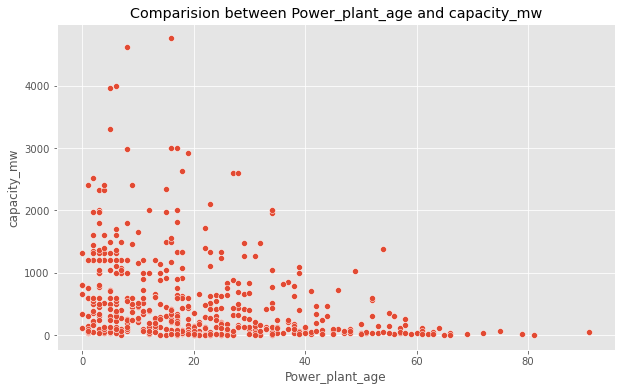

In [92]:
#Let's check the relation between power plant age and capacity_mw
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between Power_plant_age and capacity_mw')
sns.scatterplot(df['Power_plant_age'],df["capacity_mw"])


<AxesSubplot:title={'center':'Comparision between latitude and capacity_mw'}, xlabel='latitude', ylabel='capacity_mw'>

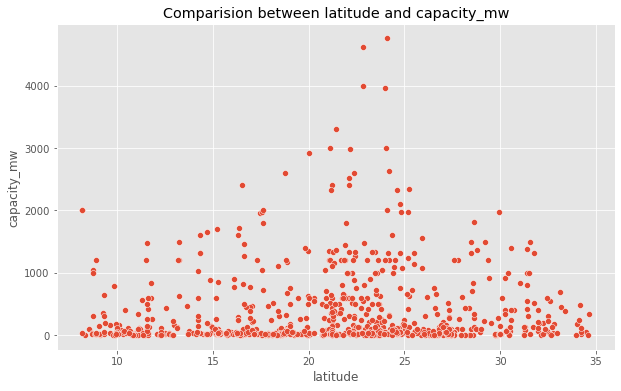

In [93]:
#Negative corelation is shown
# Checking the relation between feature latitude and targer capacity_mw
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between latitude and capacity_mw')
sns.scatterplot(df['latitude'],df["capacity_mw"])

In [94]:
#We can't see the linear relationship

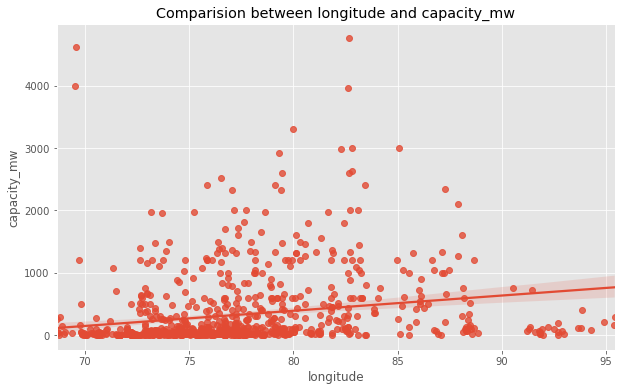

In [95]:
# Let's check the relationship between target longitude and capacity_mw
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between longitude and capacity_mw')
sns.regplot(df['longitude'],df["capacity_mw"]);


In [96]:
#Again, we cannot see any linear relationship

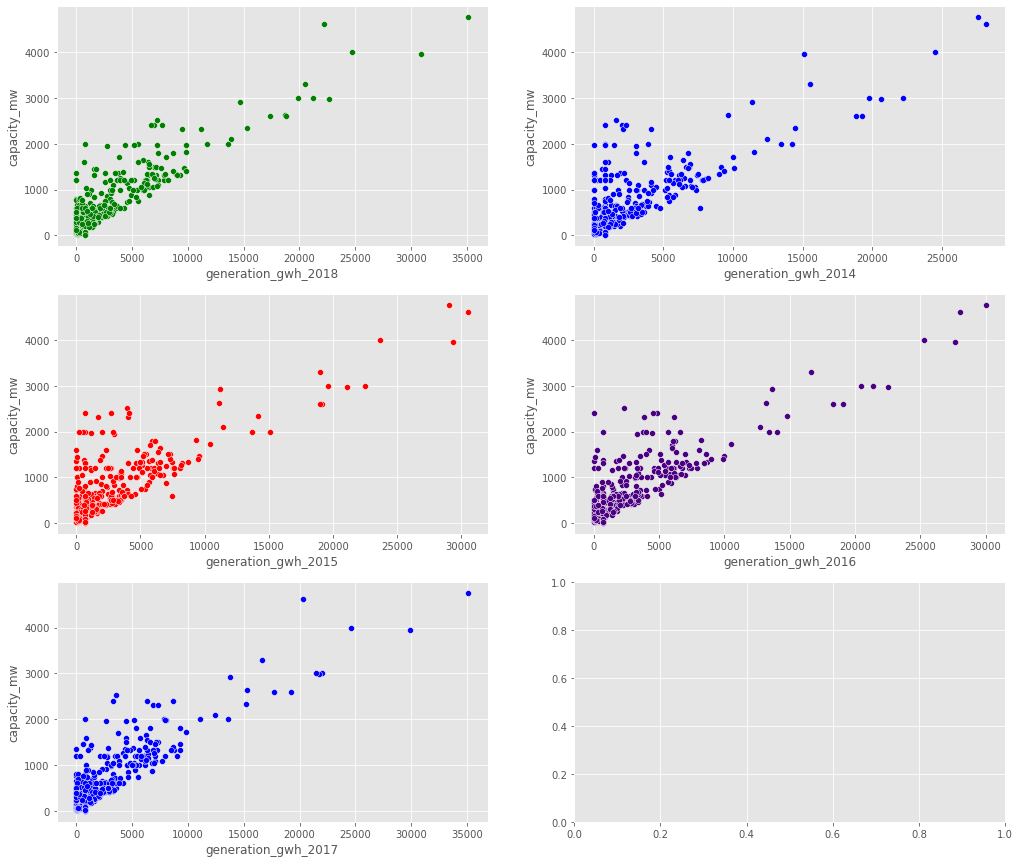

In [98]:
fig,axes=plt.subplots(3,2,figsize=(17,15))

#Let's check the relation between feature generation_gwh_2013 and targer capacity_mw
sns.scatterplot(x = "generation_gwh_2018", y = "capacity_mw",ax=axes[0,0],data = df,color="g")

#Let's check the relation between feature generation_gwh_2014 and targer capacity_mw
sns.scatterplot(x='generation_gwh_2014',y='capacity_mw',ax=axes[0,1],data=df,color="b")

#Let's check the relation between feature generation_gwh_2015 and targer capacity_mw
sns.scatterplot(x='generation_gwh_2015',y='capacity_mw',ax=axes[1,0],data=df,color="r")

#Let's check the relation between feature generation_gwh_2016 and targer capacity_mw
sns.scatterplot(x='generation_gwh_2016',y='capacity_mw',ax=axes[1,1],data=df,color="indigo")

#Let's check the relation between feature generation_gwh_2017 and targer capacity_mw
sns.scatterplot(x='generation_gwh_2017',y='capacity_mw',ax=axes[2,0],data=df,color="b")
plt.show()

Now, we can observe the positive corelation. 

This plot shows the electricity generation reported for the years has capacity above 1000 mw. Also, we have observed that as the generation growth increases, the capacity of plant is also increasing moderately.

## Corelation the target variable Fuel Types with features

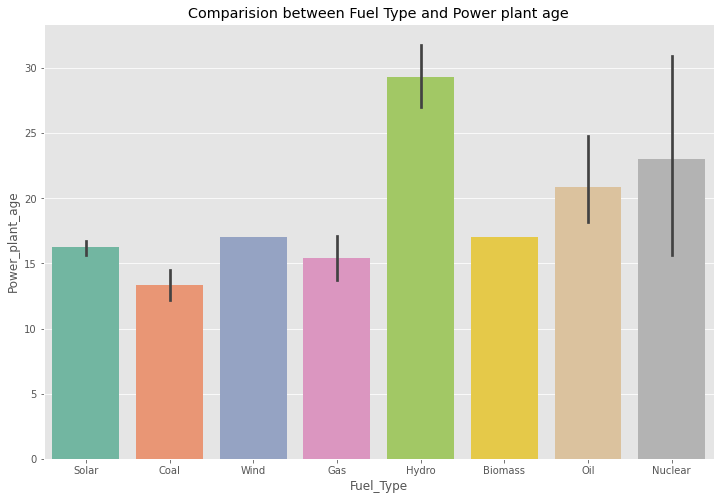

In [101]:
#Let's check the relation between target fuel_type and variable Power_plant_age
# Lets check how the power plant age affects Fuel Type
plt.figure(figsize = (12,8))
plt.title("Comparision between Fuel Type and Power plant age")
sns.barplot(x='Fuel_Type',y='Power_plant_age', data=df,palette='Set2')
plt.show()

Here, we can observe that older power plants uses Hydro as energy source, followed by oil. The power plants which are recently constructed uses Solar, Coal and Gas to gererate the power



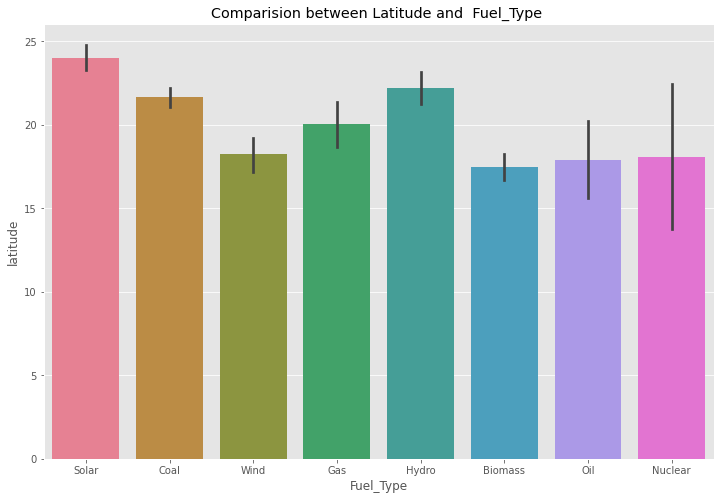

In [102]:
# Lets check how the fuel type is related to latitude of the power plant 
plt.figure(figsize = (12,8))
plt.title("Comparision between Latitude and  Fuel_Type ")
sns.barplot(df['Fuel_Type'],df['latitude'],palette='husl');

In [103]:
#We can observe that the fuel type Solar has high latitude.

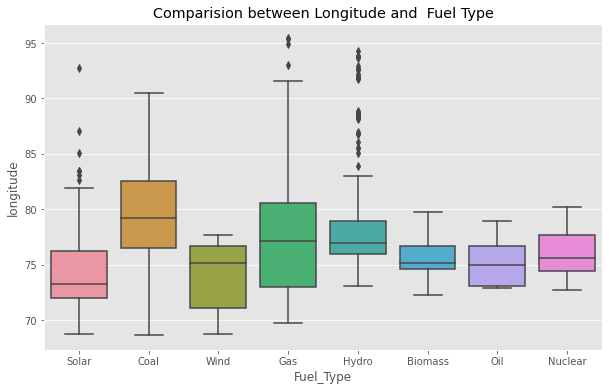

In [105]:
# Checking the relationship between target longitude and Fuel_Type
plt.figure(figsize = [10,6])
plt.style.use('ggplot')
plt.title("Comparision between Longitude and  Fuel Type")
sns.boxplot(df['Fuel_Type'],df['longitude']);


In [106]:
#The fuel type Gas has highest longitude followed by Hydro , Solar and Coal other fuel types have very less longitude.

<AxesSubplot:xlabel='generation_gwh_2017', ylabel='Fuel_Type'>

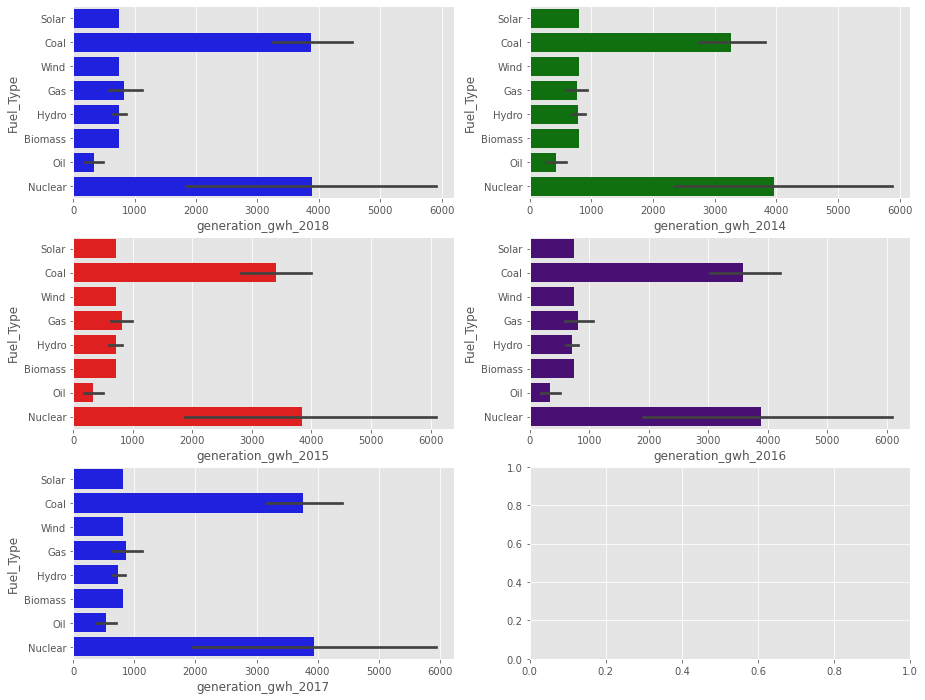

In [109]:
fig,axes=plt.subplots(3,2,figsize=(15,12))

#Checking the relation between feature generation_gwh_2013 and targer Fuel_Type
sns.barplot(x = "generation_gwh_2018", y = "Fuel_Type",ax=axes[0,0],data = df,color="b")

#Checking the relation between feature generation_gwh_2014 and targer Fuel_Type
sns.barplot(x='generation_gwh_2014',y='Fuel_Type',ax=axes[0,1],data=df,color="g")

#Checking the relation between feature generation_gwh_2015 and targer Fuel_Type
sns.barplot(x='generation_gwh_2015',y='Fuel_Type',ax=axes[1,0],data=df,color="r")

#Checking the relation between feature generation_gwh_2016 and targer Fuel_Type
sns.barplot(x='generation_gwh_2016',y='Fuel_Type',ax=axes[1,1],data=df,color="indigo")

#Checking the relation between feature generation_gwh_2017 and targer Fuel_Type
sns.barplot(x='generation_gwh_2017',y='Fuel_Type',ax=axes[2,0],data=df,color="b")


We can clearly observe that the most used energy source in all the years is neuclear followed by coal


## Checking the relationship between targets

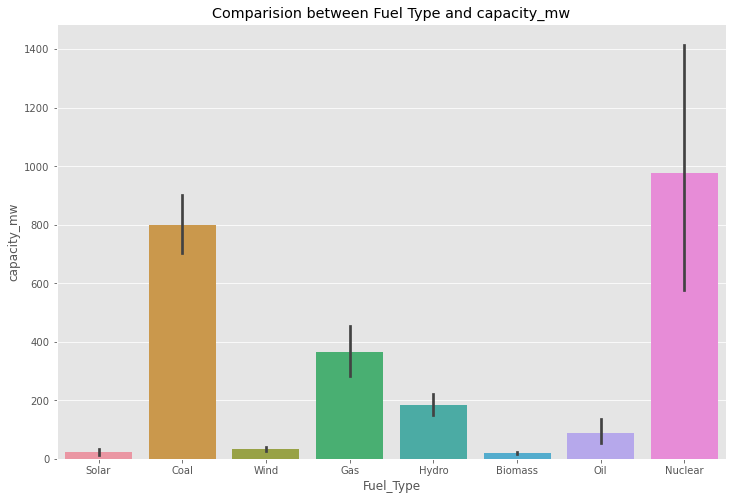

In [111]:
# let's check the relation between fuel type and capacity_mw
plt.figure(figsize=(12,8))
plt.title("Comparision between Fuel Type and capacity_mw")
sns.barplot(x= 'Fuel_Type',y = 'capacity_mw',data = df)
plt.show()


The plot shows that the capacity of generating electricity is high in Nuclear followed by Coal.


### Label Encoding

In [112]:
categorical_col = ['Fuel_Type', 'other_fuel1', 'source', 'geolocation_source']

In [113]:
LE=LabelEncoder()
df[categorical_col]= df[categorical_col].apply(LE.fit_transform)


In [114]:
df[categorical_col]


,Fuel_Type,other_fuel1,source,geolocation_source
0,6,2,109,1
1,1,2,174,2
2,7,2,21,2
3,2,2,22,2
4,1,2,22,2
...,...,...,...,...
902,1,2,22,2
903,6,2,77,0
904,7,2,21,2
905,1,2,59,2


### Working with the outliers

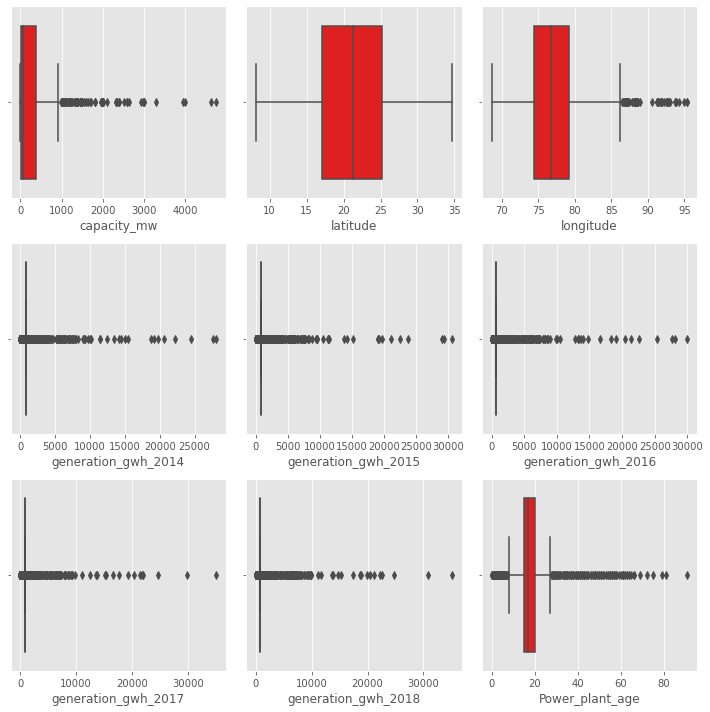

In [116]:
plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column],color="red")
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.tight_layout()

In the boxplot we can observe the outliers present in all columns except latitude. Even target column has outliers but no need to remove it.

Removing the outliers using ZSCORE method.


### ZSCORE method


In [117]:
#removing outliers
df.columns


Index(['capacity_mw', 'latitude', 'longitude', 'Fuel_Type', 'other_fuel1',
       'source', 'geolocation_source', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_gwh_2018', 'Power_plant_age'],
      dtype='object')

In [120]:
# Features containing outliers
features = df[['longitude', 'generation_gwh_2018', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017','Power_plant_age']]


In [121]:
#using zscore method to remove outliers
from scipy.stats import zscore
z=np.abs(zscore(features))

z

array([[0.86991672, 0.28839399, 0.25702178, ..., 0.27573671, 0.27556459,
        0.93307603],
       [0.58558978, 0.28839399, 0.25702178, ..., 0.27573671, 0.27556459,
        0.17269871],
       [1.67356683, 0.28839399, 0.25702178, ..., 0.27573671, 0.27556459,
        0.17269871],
       ...,
       [0.38359152, 0.28839399, 0.25702178, ..., 0.27573671, 0.27556459,
        0.17269871],
       [0.76456427, 0.28839399, 0.25702178, ..., 0.27573671, 0.27556459,
        0.17269871],
       [0.0103269 , 0.28839399, 0.25702178, ..., 0.27573671, 0.27556459,
        0.17269871]])

### We have removed the outliers.

In [122]:
#Now,we are creating new dataframe

new_df= df[(z<3).all(axis=1)]
new_df


,capacity_mw,latitude,longitude,Fuel_Type,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,2.5,28.1839,73.2407,6,2,109,1,801.123775,711.181225,737.205450,817.977250,751.644375,7.0
1,98.0,24.7663,74.6090,1,2,174,2,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
2,39.2,21.9038,69.3732,7,2,21,2,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
3,135.0,23.8712,91.3602,2,2,22,2,617.789264,843.747000,886.004428,663.774500,626.239128,14.0
4,1800.0,21.9603,82.4091,1,2,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,2,22,2,801.123775,0.994875,233.596650,865.400000,686.500000,2.0
903,3.0,12.8932,78.1654,6,2,77,0,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
904,25.5,15.2758,75.5811,7,2,21,2,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
905,80.0,24.3500,73.7477,1,2,59,2,801.123775,711.181225,737.205450,817.977250,751.644375,17.0


In [123]:
df.shape

(907, 13)

In [124]:
new_df.shape


(851, 13)

We can clearly observe that we have successfully removed the outliers. 

Since, earlier we had 907 rows and 13 columns in the dataset, But after removing the outliers we have 851 rows and 13 columns





## Correlation between the target variable and features using HEAT MAP

In [127]:
# checking the correlation between features and the target
cor = new_df.corr()
cor


,capacity_mw,latitude,longitude,Fuel_Type,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
capacity_mw,1.000000,0.050588,0.257582,-0.398039,-0.001758,-0.275724,0.234543,0.620202,0.680949,0.750088,0.788972,0.815198,-0.241487
latitude,0.050588,1.000000,-0.014145,-0.002561,0.037049,0.069430,-0.203340,0.081661,0.071346,0.057301,0.071296,0.064558,-0.097033
longitude,0.257582,-0.014145,1.000000,-0.382975,0.029191,-0.235719,0.263739,0.119473,0.154522,0.195299,0.196529,0.204421,-0.080034
Fuel_Type,-0.398039,-0.002561,-0.382975,1.000000,0.006463,0.038558,-0.478601,-0.250101,-0.276308,-0.286624,-0.289232,-0.298364,0.074358
other_fuel1,-0.001758,0.037049,0.029191,0.006463,1.000000,0.028471,-0.022827,-0.000530,0.006092,0.015479,0.011842,0.022700,-0.058103
source,-0.275724,0.069430,-0.235719,0.038558,0.028471,1.000000,-0.497893,-0.141496,-0.156317,-0.158561,-0.156155,-0.165232,-0.075353
geolocation_source,0.234543,-0.203340,0.263739,-0.478601,-0.022827,-0.497893,1.000000,0.113446,0.125329,0.127128,0.125199,0.132477,0.051608
generation_gwh_2014,0.620202,0.081661,0.119473,-0.250101,-0.000530,-0.141496,0.113446,1.000000,0.912185,0.801237,0.746130,0.738063,-0.059768
generation_gwh_2015,0.680949,0.071346,0.154522,-0.276308,0.006092,-0.156317,0.125329,0.912185,1.000000,0.907984,0.830394,0.821726,-0.130252
generation_gwh_2016,0.750088,0.057301,0.195299,-0.286624,0.015479,-0.158561,0.127128,0.801237,0.907984,1.000000,0.932729,0.913720,-0.199087


In [128]:
#this gives the correlation between the dependent and independent variables. We can visualize this by plotting heat map.


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5]),
 [Text(0, 0.5, 'capacity_mw'),
  Text(0, 1.5, 'latitude'),
  Text(0, 2.5, 'longitude'),
  Text(0, 3.5, 'Fuel_Type'),
  Text(0, 4.5, 'other_fuel1'),
  Text(0, 5.5, 'source'),
  Text(0, 6.5, 'geolocation_source'),
  Text(0, 7.5, 'generation_gwh_2014'),
  Text(0, 8.5, 'generation_gwh_2015'),
  Text(0, 9.5, 'generation_gwh_2016'),
  Text(0, 10.5, 'generation_gwh_2017'),
  Text(0, 11.5, 'generation_gwh_2018'),
  Text(0, 12.5, 'Power_plant_age')])

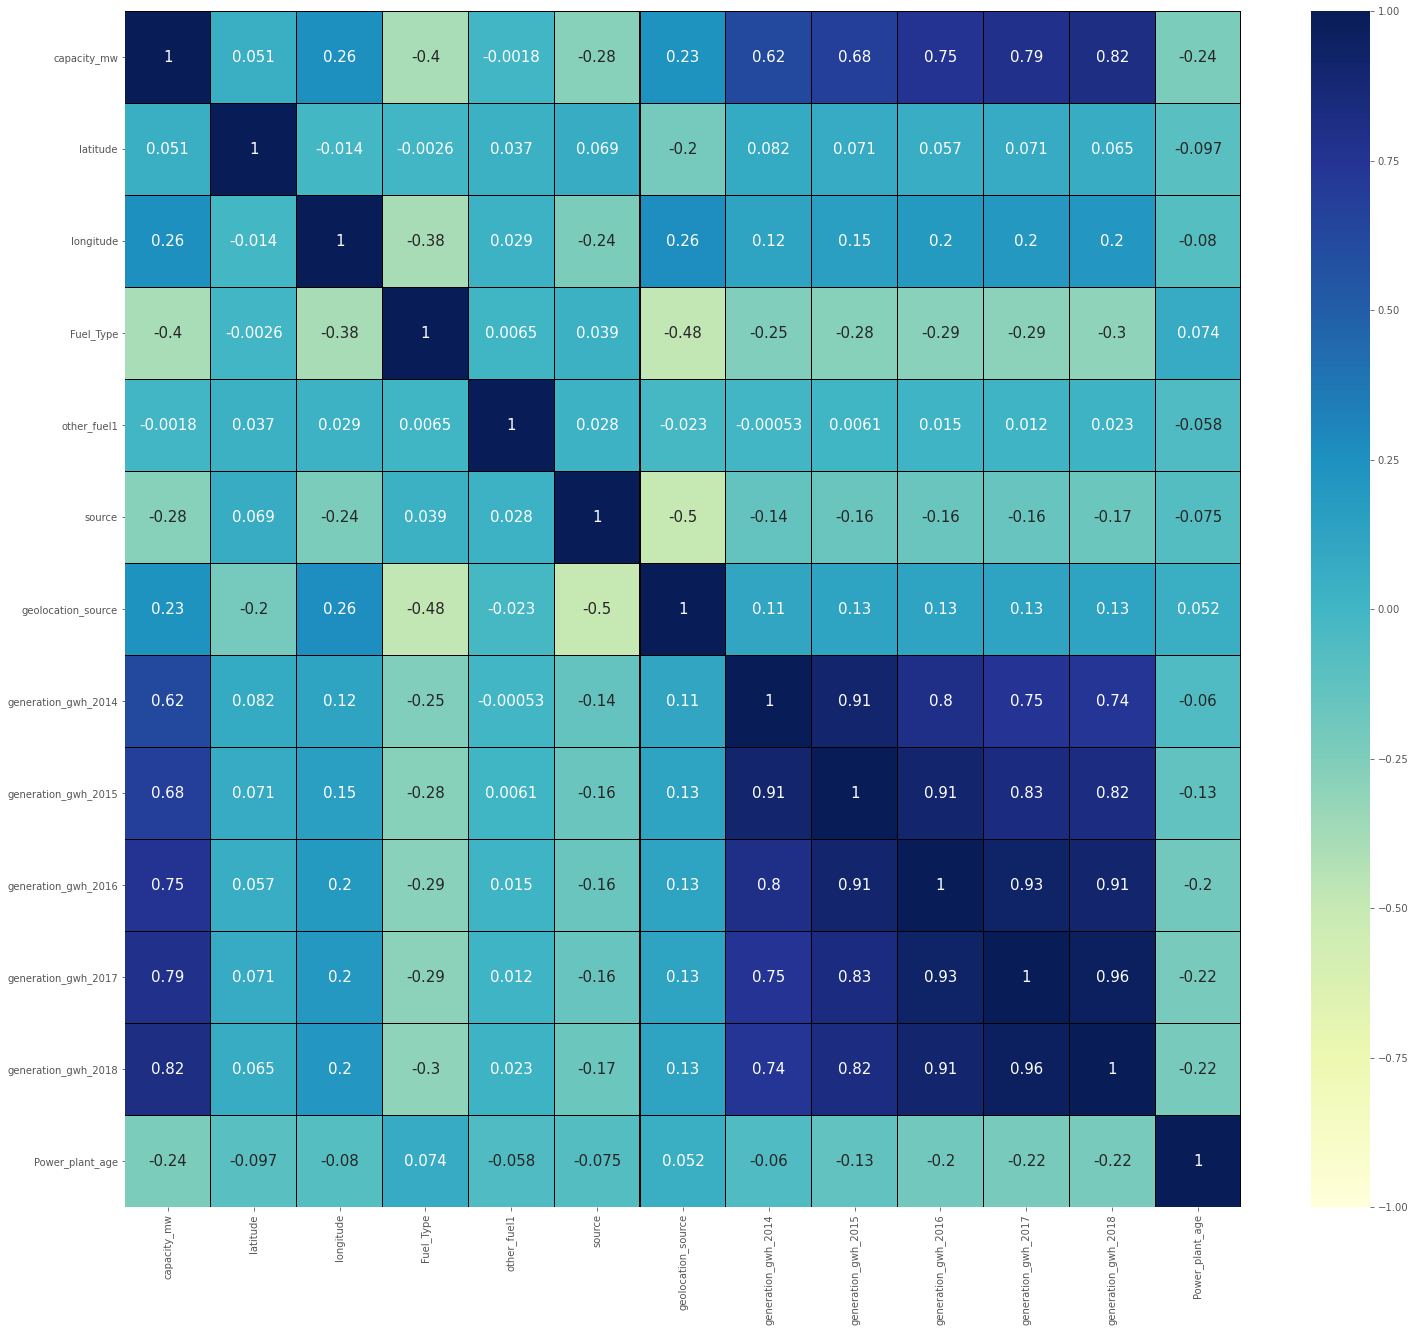

In [130]:
# visualizing the correlation matrix by plotting heat map
plt.figure(figsize=(25,22))
sns.heatmap(new_df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.2g', annot = True, linecolor="black",annot_kws={'size':15},cmap="YlGnBu")
plt.yticks(rotation=0)

This heatmap Shows the correlation matrix by visualizing the data .

Here, we can observe the relation between feature to feature and feature to label.

Also, this heat map contains both positive and negative correlation.


Correlation between capacity_mw and features

The label capacity_mw is highly positively correlated with the features generation_gwh_2017, generation_gwh_2016, generation_gwh_2015, generation_gwh_2014 , generation_gwh_2018.

The label is negatively correlated with the features Fuel_Type, source and Power_plant_age.

The columns other_fuel1 and latitude have no relation with the label, so we can drop them.

Correlation between Fuel_Type and features

The label Fuel_Type is less correlate with Power_plant_age and source

The label is negatively correlated with geolocation_souce, longitude, capacity_mw and all generation_gwh years

From the heat map we can notice most of the features are highly correlated with each other which leads to multicollinearty problem. So will try to solve this problem by Checking VIF value befor building our models.

Also the features other_fuel1 and latitude have very less correlation with both the labels . Let's drop those columns.

### Visualizing the correlation between label and features using bar plot


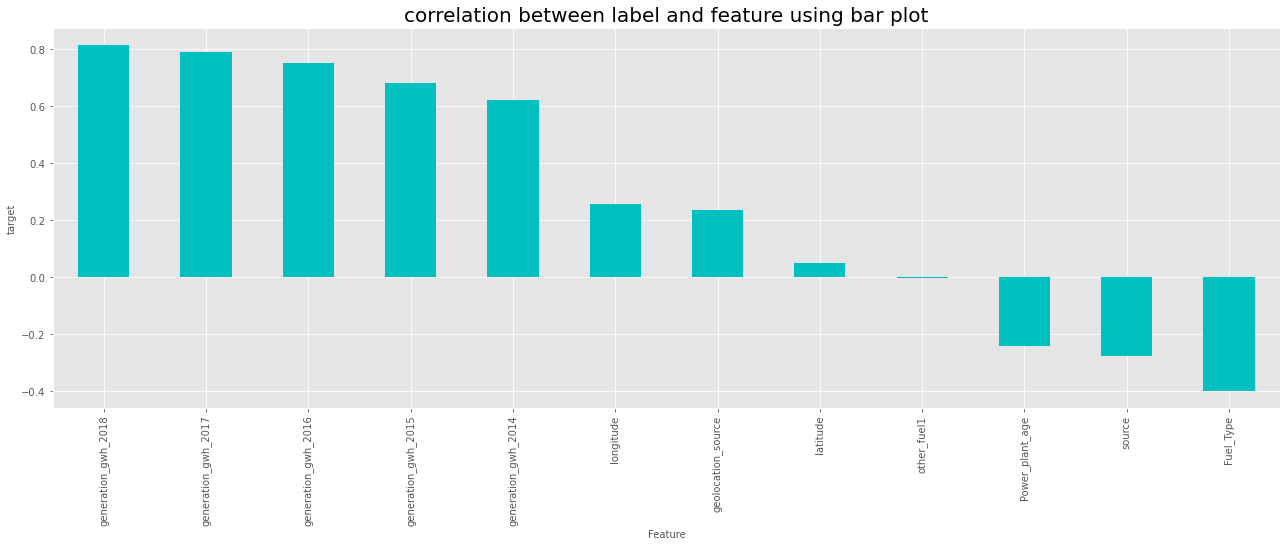

In [131]:
plt.figure(figsize=(22,7))
new_df.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=10)
plt.ylabel('target',fontsize=10)
plt.title('correlation between label and feature using bar plot',fontsize=20)
plt.show()

In [132]:
#it is to check the correlation between capacity_mw and features . Here we can easily notice the positive and negative correlation between the features and the label.


### Visualizing the correlation between label and features using bar plot


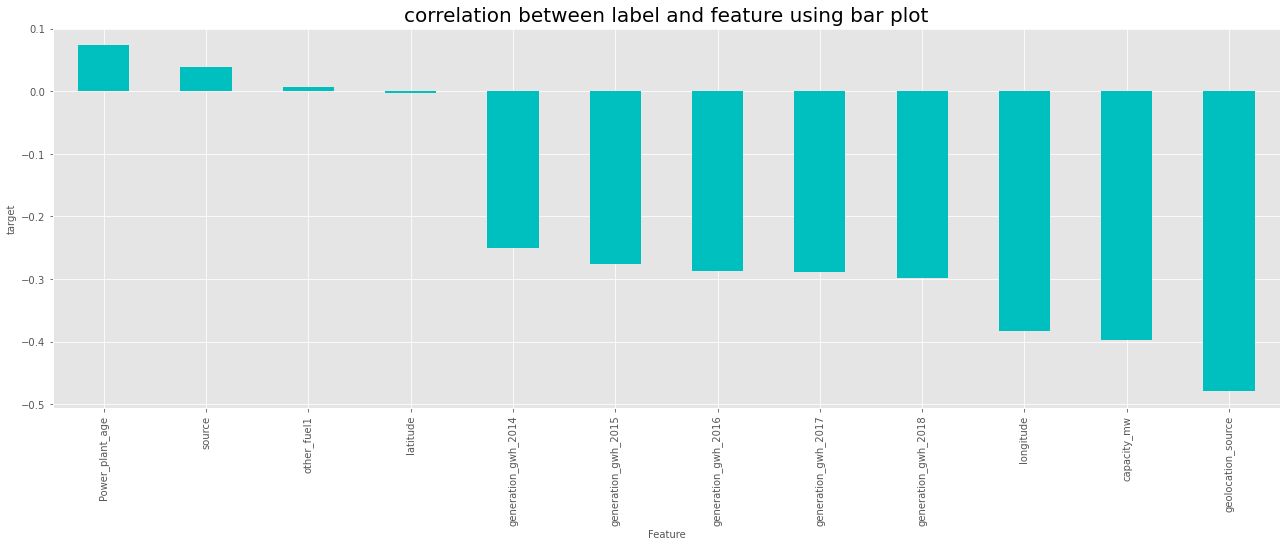

In [133]:
plt.figure(figsize=(22,7))
new_df.corr()['Fuel_Type'].sort_values(ascending=False).drop(['Fuel_Type']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=10)
plt.ylabel('target',fontsize=10)
plt.title('correlation between label and feature using bar plot',fontsize=20)
plt.show()


This is the bar plot to check the correlation between Fuel_Type and features. Here we can easily notice the positive and negative correlation between the features and the label.


From both the bar plots we can observe that the columns other_fuel1 and latitude have very less correlation with both the labels capacity_mw and Fuel_Type. Let's drop those columns.



## Feature selection by dropping irrelevant features


In [134]:
# dropping irrelevant columns
new_df.drop('other_fuel1',axis=1,inplace=True)
new_df.drop('latitude',axis=1,inplace=True)


In [135]:
new_df.head()


,capacity_mw,longitude,Fuel_Type,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,2.5,73.2407,6,109,1,801.123775,711.181225,737.205450,817.977250,751.644375,7.0
1,98.0,74.6090,1,174,2,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
2,39.2,69.3732,7,21,2,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
3,135.0,91.3602,2,22,2,617.789264,843.747000,886.004428,663.774500,626.239128,14.0
4,1800.0,82.4091,1,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,3.0


# PREDICTION

### 1. Capacity_mw


Seperating the features and target variable

In [136]:
x=new_df.drop('capacity_mw', axis=1)
y=new_df["capacity_mw"]


In [137]:
x.shape


(851, 10)

In [138]:
y.shape


(851,)

## Checking for SKEWNESS


In [139]:
x.skew()


longitude              0.945877
Fuel_Type              0.413759
source                 1.734252
geolocation_source    -2.066536
generation_gwh_2014    2.943026
generation_gwh_2015    2.714999
generation_gwh_2016    2.645786
generation_gwh_2017    2.546541
generation_gwh_2018    2.597029
Power_plant_age        1.280800
dtype: float64

The following columns have skewness more than +0.5 and -0.5.

longitude, source, generation_gwh_2018, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, Power_plant_age



### Removing skewness using yeo_johnson method

In [145]:
skew = ['longitude','generation_gwh_2018','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','Power_plant_age']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')


In [146]:
x[skew] = scaler.fit_transform(x[skew].values)
x[skew].head()


,longitude,generation_gwh_2018,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Power_plant_age
0,-0.922017,-0.033504,-0.015816,-0.023850,-0.021809,-0.014102,-1.080965
1,-0.499922,-0.033504,-0.015816,-0.023850,-0.021809,-0.014102,0.044852
2,-2.377221,-0.033504,-0.015816,-0.023850,-0.021809,-0.014102,0.044852
3,2.431155,-0.171808,-0.244117,0.119032,0.129852,-0.179899,-0.247030
4,1.262070,2.254026,1.395779,2.192289,2.187260,1.925736,-1.755543


In [147]:
# checking skewness after using yeo-johnson method
x.skew()

longitude              0.000632
Fuel_Type              0.413759
source                -0.173043
geolocation_source    -2.066536
generation_gwh_2014   -0.104472
generation_gwh_2015   -0.094369
generation_gwh_2016   -0.088905
generation_gwh_2017   -0.069609
generation_gwh_2018   -0.090533
Power_plant_age        0.053756
dtype: float64

In [148]:
#the skewness has been removed

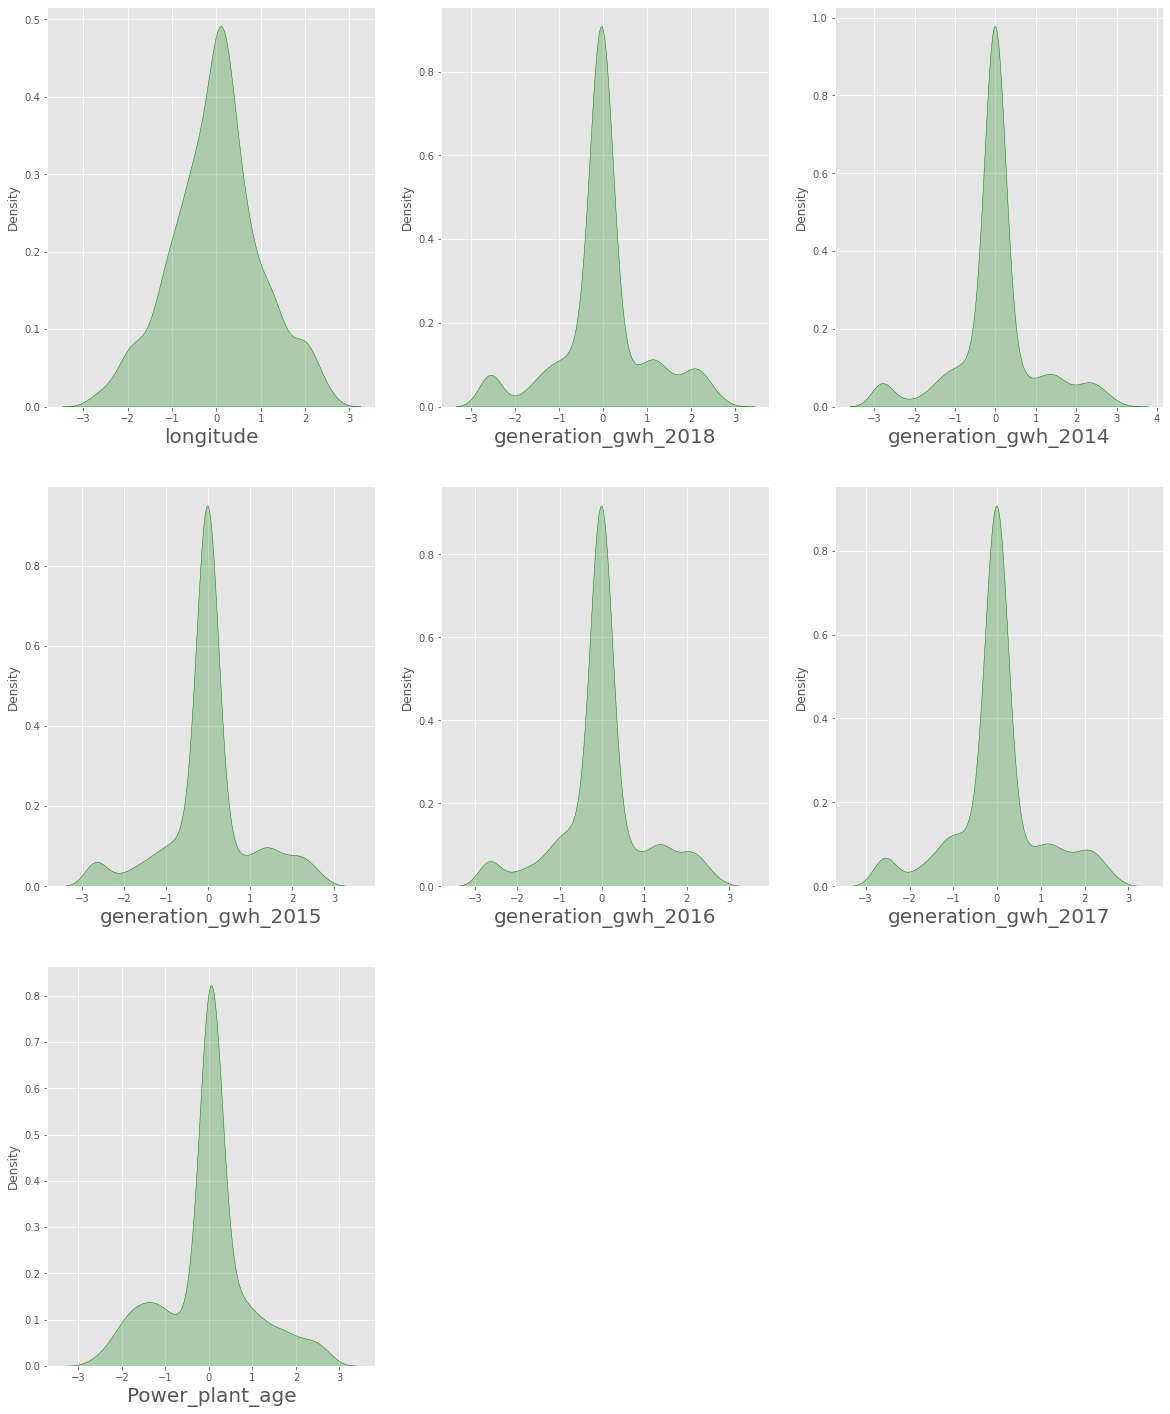

In [149]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in x[skew]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(x[column],color='g',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [150]:
#the data is not normal but the skewness has been reduced in all the columns


### Feature Scalling

In [151]:
#Scalling the data using Standard Scaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x


,longitude,Fuel_Type,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-0.922017,1.175506,1.528061,-1.036523,-0.015816,-0.023850,-0.021809,-0.014102,-0.033504,-1.080965
1,-0.499922,-0.975797,1.981788,0.407145,-0.015816,-0.023850,-0.021809,-0.014102,-0.033504,0.044852
2,-2.377221,1.605767,-0.488176,0.407145,-0.015816,-0.023850,-0.021809,-0.014102,-0.033504,0.044852
3,2.431155,-0.545536,-0.421677,0.407145,-0.244117,0.119032,0.129852,-0.179899,-0.171808,-0.247030
4,1.262070,-0.975797,-0.421677,0.407145,1.395779,2.192289,2.187260,1.925736,2.254026,-1.755543
...,...,...,...,...,...,...,...,...,...,...
846,0.231807,-0.975797,-0.421677,0.407145,-0.015816,-2.588699,-0.840417,0.032040,-0.102890,-1.977182
847,0.421487,1.175506,1.158844,-2.480190,-0.015816,-0.023850,-0.021809,-0.014102,-0.033504,0.044852
848,-0.224526,1.605767,-0.488176,0.407145,-0.015816,-0.023850,-0.021809,-0.014102,-0.033504,0.044852
849,-0.760667,-0.975797,0.856354,0.407145,-0.015816,-0.023850,-0.021809,-0.014102,-0.033504,0.044852


The dataset x has now been scalled now.

### Checking VIF (Variance Inflation Factor ) Values

In [152]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x.values,i)
              for  i in range(len(x.columns))]
vif['features'] = x.columns

# let's check the values
vif


,VIF values,features
0,1.292336,longitude
1,1.624549,Fuel_Type
2,1.288076,source
3,1.636152,geolocation_source
4,3.423531,generation_gwh_2014
5,5.801733,generation_gwh_2015
6,9.492504,generation_gwh_2016
7,8.992749,generation_gwh_2017
8,8.445361,generation_gwh_2018
9,1.098133,Power_plant_age


Here, we can observe all the columns have VIF less than 10 which means we are free from multicolinearity problem or multicolinearity problem exists.


## MODELLING FOR CAPACITY_MW

In [155]:
#Finding best random state
maxAccu=0
maxRS=0
for i in range(1,100): 
    x_train,x_test, y_train, y_test =train_test_split(x,y, test_size=.30,random_state=i)
    mod=RandomForestRegressor()
    mod.fit(x_train, y_train)
    pred=mod.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('R2 Score=', maxAccu, 'Random_State',maxRS)


R2 Score= 0.8516558591789348 Random_State 94


We got r2 score of 85% at a random state of 94



### Train_test_Split


In [156]:
x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=.30, random_state=maxRS)


## Linear Regression


In [158]:
# Checking r2score for Linear Regression
LR = LinearRegression()
LR.fit(x_train,y_train)

# prediction
predLR=LR.predict(x_test)
print('R2_score:',r2_score(y_test,predLR))

# Mean Absolute Error (MAE)
print('MAE:',metrics.mean_absolute_error(y_test, predLR))

# Mean Squared Error (MSE)
print('MSE:',metrics.mean_squared_error(y_test, predLR))

# Root Mean Squared Error (RMSE)
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predLR)))

R2_score: 0.5694732376940745
MAE: 204.2436473633827
MSE: 80711.41791608137
RMSE: 284.0975500001388


Getting an accuracy score of 56.9% with the base line Linear Regression Model

### Random Forest Regressor

In [160]:
rf=RandomForestRegressor()
rf.fit(x_train, y_train)

# prediction
predrf=rf.predict(x_test)
print('R2_score:',r2_score(y_test,predrf))

# Mean Absolute Error (MAE)
print('MAE:',metrics.mean_absolute_error(y_test, predrf))

# Mean Squared Error (MSE)
print('MSE:',metrics.mean_squared_error(y_test, predrf))

# Root Mean Squared Error (RMSE)
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predrf)))

R2_score: 0.8400341155450439
MAE: 91.66487989789938
MSE: 29989.014581595613
RMSE: 173.17336568189583


The R2 score value for Random Forest Regressor model is 84%

### Decision Tree Regressor


In [164]:
# checking r2 score for decision tree regressor
DTR = DecisionTreeRegressor()
DTR.fit(x_train,y_train)

# prediction
predDTR=DTR.predict(x_test)
print('R2_Score:',r2_score(y_test,predDTR))
print('MAE:',metrics.mean_absolute_error(y_test,predDTR))
print('MSE:',metrics.mean_squared_error(y_test,predDTR))
print('RNSE:',np.sqrt(metrics.mean_squared_error(y_test,predDTR)))

R2_Score: 0.7526207058417096
MAE: 110.51467466517857
MSE: 46376.521375010925
RNSE: 215.352086999432


### Gradient Boosting Regressor

In [174]:
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)

predgb=gb.predict(x_test)
print('R2_Score:',r2_score(y_test,predgb))

# Mean Absolute Error (MAE)
print('MAE:',metrics.mean_absolute_error(y_test, predgb))

# Mean Squared Error (MSE)
print('MSE:',metrics.mean_squared_error(y_test, predgb))

# Root Mean Squared Error (RMSE)
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predgb)))

R2_Score: 0.8209981840710219
MAE: 100.98243795717022
MSE: 33557.70567153516
RMSE: 183.1876242313742


### Bagging Regressor

In [176]:
br=BaggingRegressor()
br.fit(x_train,y_train)

predbr=br.predict(x_test)
print('R2_Score:',r2_score(y_test,predbr))

# Mean Absolute Error (MAE)
print('MAE:',metrics.mean_absolute_error(y_test, predbr))

# Mean Squared Error (MSE)
print('MSE:',metrics.mean_squared_error(y_test, predbr))

# Root Mean Squared Error (RMSE)
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predbr)))

R2_Score: 0.8242559199957307
MAE: 96.21519558448907
MSE: 32946.973636501825
RMSE: 181.5130123062857


Getting the r2score for this model as 82%

### Cross- Validation

In [177]:
# Checking cv score for Linear Regression
print(cross_val_score(LR,x,y,cv=5).mean())

# Checking cv score for Random Forest Regressor
print(cross_val_score(rf,x,y,cv=5).mean())

#Checking the cv score for GradientBoostingRegressor
print(cross_val_score(gb,x,y,cv=5).mean())

#Checking the cv score for BaggingRegressor
print(cross_val_score(br,x,y,cv=5).mean())

0.5074863341981597
0.7816641615064702
0.7506670882147599
0.7486567713693676


From the above observation the difference between R2 score and the Cross Validation score we conclude that Random Forest Regressor as our best model.


Let's increase the accuracy of the model by using Hyper Parameter Tuning.

## Hyper Parameter Tuning

In [178]:
from sklearn.model_selection import GridSearchCV

# Random Forest Regressor
parameters = {'criterion':['mse','mae'],
             'max_features':['auto','sqrt','log2'],
             'n_estimators':[0,200],
             'max_depth':[2,3,4,6]}


In [179]:
GCV = GridSearchCV(RandomForestRegressor(),parameters,cv=5)

In [180]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 3, 4, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [0, 200]})

In [181]:
GCV.best_params_


{'criterion': 'mae',
 'max_depth': 6,
 'max_features': 'log2',
 'n_estimators': 200}

These are the best parameters for the RandomForestRegressor

In [183]:
capacity_mw = RandomForestRegressor(criterion='mse', max_depth=6, max_features='log2', n_estimators=200)
capacity_mw.fit(x_train, y_train)
pred = capacity_mw.predict(x_test)
print('R2_Score:',r2_score(y_test,pred)*100)
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test, predrf)))

R2_Score: 82.56877770375814
RMSE value: 173.17336568189583


After HyperParameter Tuning, we are getting an accuracy score of 82%

### Saving the model


In [184]:
import joblib
joblib.dump(capacity_mw,"Global_Power_Plant_capacity_mw.pkl")

['Global_Power_Plant_capacity_mw.pkl']

## 2. Prediction for Fuel_Type


Separating the features and label variables into x_df and y_df


In [185]:
x_df = new_df.drop("Fuel_Type", axis=1)
y_df = new_df["Fuel_Type"]
x_df.shape


(851, 10)

In [186]:
y_df.shape


(851,)

We have dimensuins of x and y

## Checking for Skewness

In [188]:
x_df.skew().sort_values()

geolocation_source    -2.066536
longitude              0.945877
Power_plant_age        1.280800
source                 1.734252
capacity_mw            2.170245
generation_gwh_2017    2.546541
generation_gwh_2018    2.597029
generation_gwh_2016    2.645786
generation_gwh_2015    2.714999
generation_gwh_2014    2.943026
dtype: float64

Here, we can observe that there are skewness in most of the columns

## Removing the skewness


In [189]:
skew = ['capacity_mw','longitude','generation_gwh_2018','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','Power_plant_age']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [190]:
x_df[skew] = scaler.fit_transform(x_df[skew].values)
x_df[skew].head()


,capacity_mw,longitude,generation_gwh_2018,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Power_plant_age
0,-1.677389,-0.922012,-0.057181,-0.044061,-0.049141,-0.046103,-0.035226,-1.081421
1,0.220284,-0.499829,-0.057181,-0.044061,-0.049141,-0.046103,-0.035226,0.046187
2,-0.274381,-2.377759,-0.057181,-0.044061,-0.049141,-0.046103,-0.035226,0.046187
3,0.391670,2.430594,-0.194159,-0.268922,0.093773,0.105691,-0.199692,-0.245810
4,1.731859,1.261979,2.347272,1.426798,2.286603,2.276671,1.983083,-1.758384


In [191]:
x_df.skew().sort_values()


geolocation_source    -2.066536
longitude             -0.000128
capacity_mw            0.016303
Power_plant_age        0.043734
generation_gwh_2017    0.127152
generation_gwh_2018    0.133691
generation_gwh_2016    0.147035
generation_gwh_2015    0.163587
generation_gwh_2014    0.232399
source                 1.734252
dtype: float64

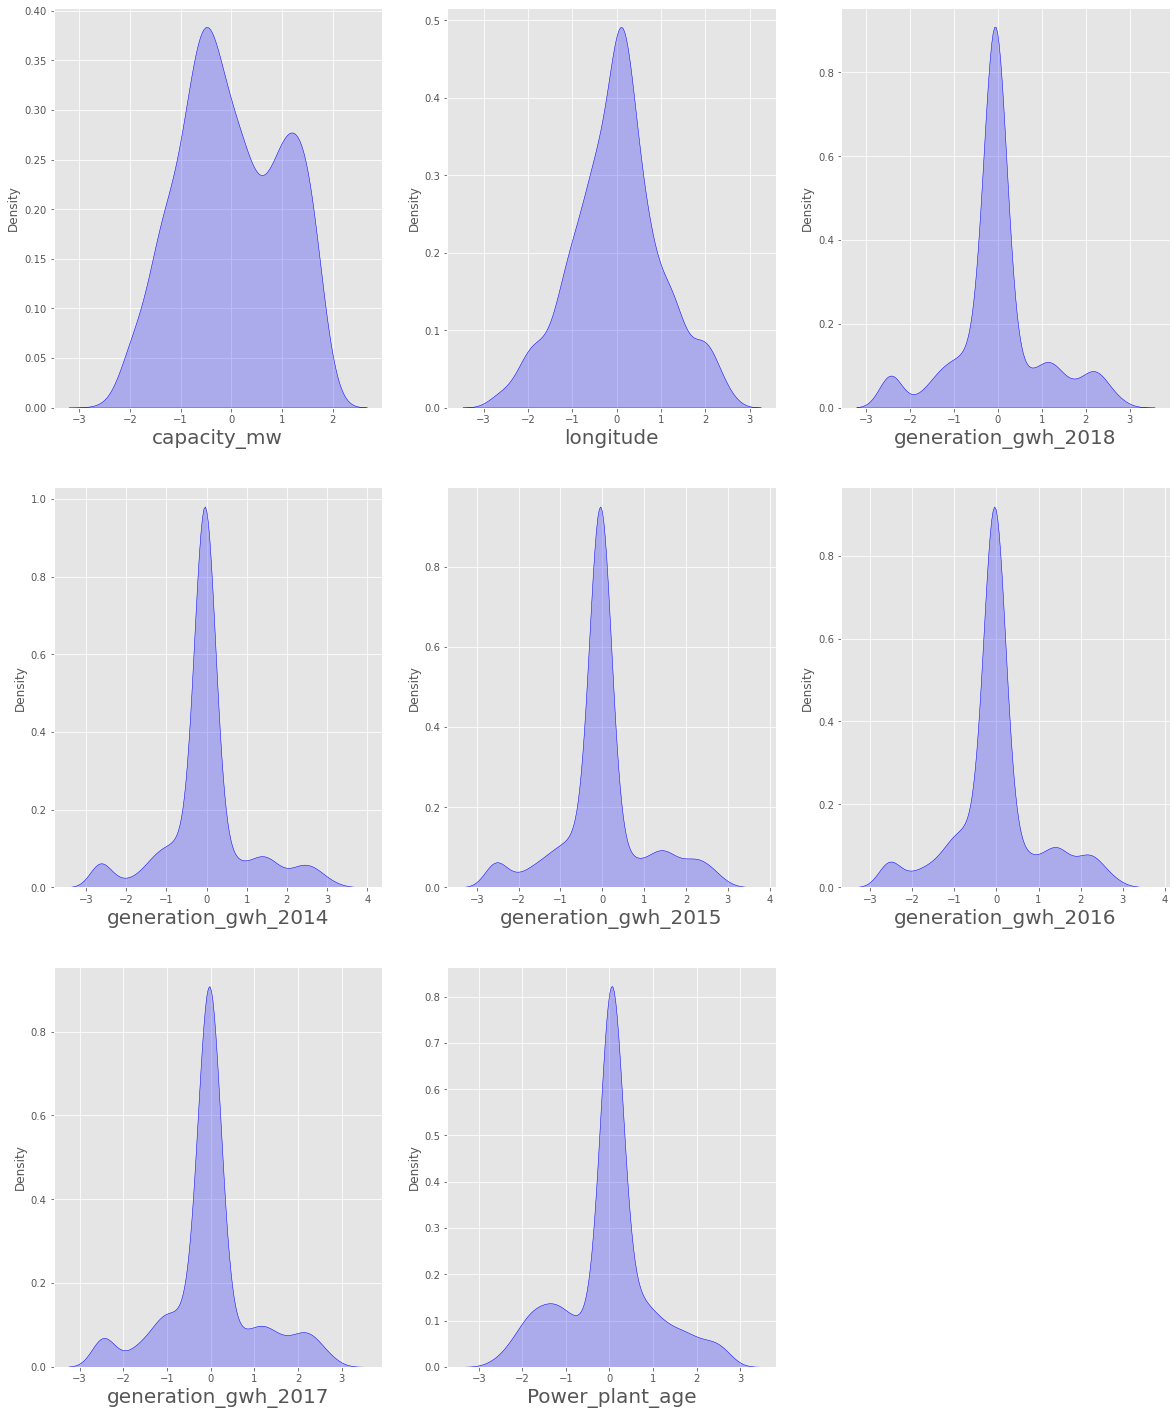

In [192]:
#Lets visualize the data

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in x_df[skew]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(x_df[column],color='b',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

We can observe that the skewness has be removed.

## Feature Scalling

In [193]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_df = pd.DataFrame(scaler.fit_transform(x_df), columns=x_df.columns)
x_df


,capacity_mw,longitude,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-1.677389,-0.922012,1.397951,-1.036523,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,-1.081421
1,0.220284,-0.499829,2.821796,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
2,-0.274381,-2.377759,-0.529717,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
3,0.391670,2.430594,-0.507812,0.407145,-0.268922,0.093773,0.105691,-0.199692,-0.194159,-0.245810
4,1.731859,1.261979,-0.507812,0.407145,1.426798,2.286603,2.276671,1.983083,2.347272,-1.758384
...,...,...,...,...,...,...,...,...,...,...
846,1.672840,0.231932,-0.507812,0.407145,-0.044061,-2.461379,-0.842266,0.010837,-0.126054,-1.980960
847,-1.598186,0.421592,0.696980,-2.480190,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
848,-0.507278,-0.224400,-0.529717,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
849,0.111201,-0.760624,0.302685,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187


Here we have scalled the dataset

## Checking VIF values


In [194]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x_df.values,i)
              for i in range(len(x_df.columns))]
vif["Features"] = x_df.columns
vif


,VIF values,Features
0,1.811775,capacity_mw
1,1.193670,longitude
2,1.413037,source
3,1.590869,geolocation_source
4,3.621608,generation_gwh_2014
5,6.190754,generation_gwh_2015
6,9.961303,generation_gwh_2016
7,9.767170,generation_gwh_2017
8,8.961146,generation_gwh_2018
9,1.153813,Power_plant_age


We have observe that all the columns has vif values less then 10, hence there is no multicolinearity that exist.



In [195]:
y_df.value_counts()


1    238
3    220
6    126
7    123
2     65
0     50
5     20
4      9
Name: Fuel_Type, dtype: int64

We can see that the target Fuel_Type has multiple classes in the mode of energy source, hence we can see that this is a multi classification problem. 

## Modeling


### Finding the best random state

In [201]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu=0
macRS=0
for i in range(1,200):
    x_df_train,x_df_test,y_df_train,y_df_test = train_test_split(x_df,y_df,test_size=.30,random_state=i)
    DTC = DecisionTreeClassifier()
    DTC.fit(x_df_train,y_df_train)
    pred = DTC.predict(x_df_test)
    acc=accuracy_score(y_df_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8359375  on Random_state  167


We got an accuracy score of 83% with a RandomState of 167

## Creating train_test_split

In [204]:
x_df_train,x_df_test,y_df_train,y_df_test=train_test_split(x_df,y_df,test_size=.30,random_state=maxRS)


We have created a new train test split using Random State

## 1.Logistic Regression

In [206]:
# Checking Accuracy for Logistic Regression
log = LogisticRegression()
log.fit(x_df_train,y_df_train)

#Prediction
predlog = log.predict(x_df_test)

print(accuracy_score(y_df_test, predlog))
print(confusion_matrix(y_df_test, predlog))
print(classification_report(y_df_test,predlog))

0.703125
[[ 8  1  0  1  0  0  0  5]
 [ 4 54  2  6  1  1  0  3]
 [ 1  6  2  5  0  0  0  0]
 [ 0 16  1 48  0  0  0  9]
 [ 0  1  0  1  0  0  0  0]
 [ 0  4  0  0  0  2  0  0]
 [ 0  2  0  0  0  0 40  0]
 [ 0  0  0  6  0  0  0 26]]
              precision    recall  f1-score   support

           0       0.62      0.53      0.57        15
           1       0.64      0.76      0.70        71
           2       0.40      0.14      0.21        14
           3       0.72      0.65      0.68        74
           4       0.00      0.00      0.00         2
           5       0.67      0.33      0.44         6
           6       1.00      0.95      0.98        42
           7       0.60      0.81      0.69        32

    accuracy                           0.70       256
   macro avg       0.58      0.52      0.53       256
weighted avg       0.70      0.70      0.69       256



The accuracy is 70%

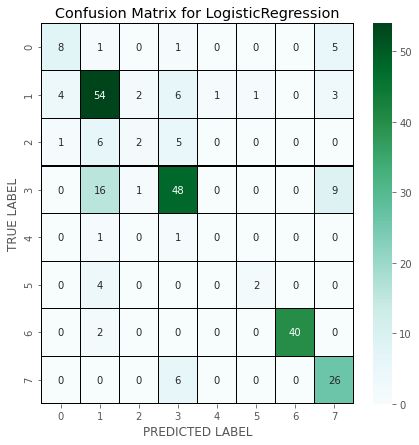

In [207]:
# Plotting Confusion_Matrix
cm = confusion_matrix(y_df_test,predlog)

x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for LogisticRegression')
plt.show()


## 2.Random Forest Classifier

In [210]:
# Checking accuracy for Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(x_df_train,y_df_train)

# Prediction
predrf = rf.predict(x_df_test)

print(accuracy_score(y_df_test, predrf))
print(confusion_matrix(y_df_test, predrf))
print(classification_report(y_df_test,predrf))

0.83203125
[[ 9  6  0  0  0  0  0  0]
 [ 0 59  3  6  0  1  0  2]
 [ 1  5  4  4  0  0  0  0]
 [ 0  9  0 65  0  0  0  0]
 [ 0  1  1  0  0  0  0  0]
 [ 0  2  1  0  0  3  0  0]
 [ 1  0  0  0  0  0 41  0]
 [ 0  0  0  0  0  0  0 32]]
              precision    recall  f1-score   support

           0       0.82      0.60      0.69        15
           1       0.72      0.83      0.77        71
           2       0.44      0.29      0.35        14
           3       0.87      0.88      0.87        74
           4       0.00      0.00      0.00         2
           5       0.75      0.50      0.60         6
           6       1.00      0.98      0.99        42
           7       0.94      1.00      0.97        32

    accuracy                           0.83       256
   macro avg       0.69      0.63      0.66       256
weighted avg       0.82      0.83      0.82       256



The accuracy score for RandomForestClassifier is 83%

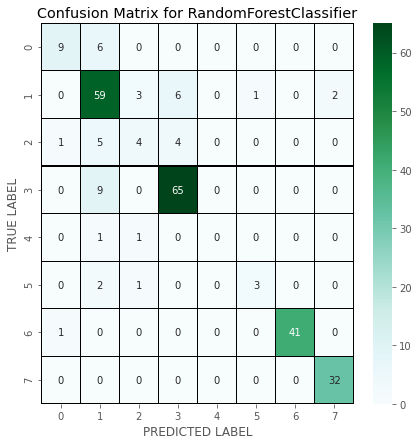

In [211]:
# Lets plot confusion matrix for RandomForestClassifier
cm = confusion_matrix(y_df_test,predrf)

x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()


## 3.Decission Tree Classifier


In [214]:
# Checking Accuracy for Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(x_df_train,y_df_train)

#Prediction
preddtc = dtc.predict(x_df_test)

print(accuracy_score(y_df_test, preddtc))
print(confusion_matrix(y_df_test, preddtc))
print(classification_report(y_df_test,preddtc))

0.8359375
[[ 9  6  0  0  0  0  0  0]
 [ 0 58  4  6  2  0  0  1]
 [ 1  6  6  1  0  0  0  0]
 [ 0  6  2 65  0  1  0  0]
 [ 0  2  0  0  0  0  0  0]
 [ 0  2  1  0  0  3  0  0]
 [ 1  0  0  0  0  0 41  0]
 [ 0  0  0  0  0  0  0 32]]
              precision    recall  f1-score   support

           0       0.82      0.60      0.69        15
           1       0.72      0.82      0.77        71
           2       0.46      0.43      0.44        14
           3       0.90      0.88      0.89        74
           4       0.00      0.00      0.00         2
           5       0.75      0.50      0.60         6
           6       1.00      0.98      0.99        42
           7       0.97      1.00      0.98        32

    accuracy                           0.84       256
   macro avg       0.70      0.65      0.67       256
weighted avg       0.84      0.84      0.83       256



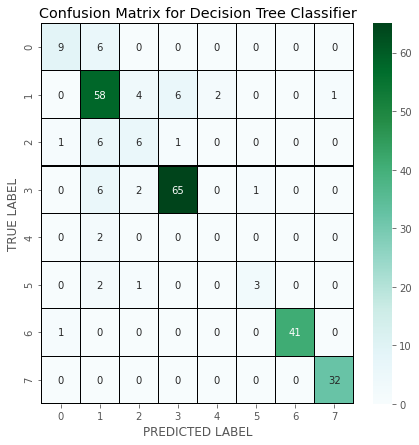

In [215]:
# Lets plot confusion matrix for DTC
cm = confusion_matrix(y_df_test,preddtc)

x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

## 4.Support Vector Machine Classifier

In [217]:
# Checking accuracy for Support Vector Machine Classifier
svc = SVC()
svc.fit(x_df_train,y_df_train)

# Prediction
predsvc = svc.predict(x_df_test)

print(accuracy_score(y_df_test, predsvc))
print(confusion_matrix(y_df_test, predsvc))
print(classification_report(y_df_test,predsvc))

0.72265625
[[ 6  4  0  0  0  0  0  5]
 [ 5 56  2  4  0  0  0  4]
 [ 1  6  2  4  0  0  0  1]
 [ 0 17  0 49  0  0  0  8]
 [ 0  2  0  0  0  0  0  0]
 [ 0  4  1  1  0  0  0  0]
 [ 0  2  0  0  0  0 40  0]
 [ 0  0  0  0  0  0  0 32]]
              precision    recall  f1-score   support

           0       0.50      0.40      0.44        15
           1       0.62      0.79      0.69        71
           2       0.40      0.14      0.21        14
           3       0.84      0.66      0.74        74
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         6
           6       1.00      0.95      0.98        42
           7       0.64      1.00      0.78        32

    accuracy                           0.72       256
   macro avg       0.50      0.49      0.48       256
weighted avg       0.71      0.72      0.70       256



The accuracy scoe for svc is 72%

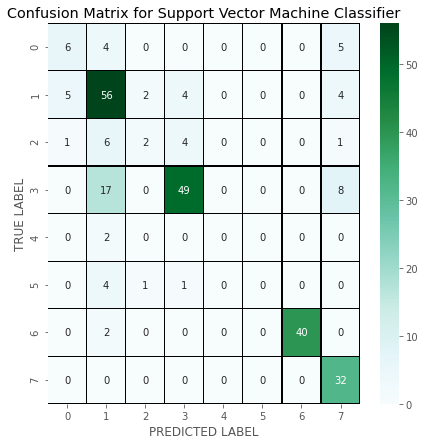

In [218]:
# Lets plot confusion matrix for Support Vector Machine Classifier
cm = confusion_matrix(y_df_test,predsvc)

x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Support Vector Machine Classifier')
plt.show()

## 5.Gradient Boosting Classifier


In [221]:
# Checking accuracy for Gradient Boosting Classifier
GB = GradientBoostingClassifier()
GB.fit(x_df_train,y_df_train)

# Prediction
predGB = GB.predict(x_df_test)

print(accuracy_score(y_df_test, predGB))
print(confusion_matrix(y_df_test, predGB))
print(classification_report(y_df_test,predGB))

0.83203125
[[ 7  8  0  0  0  0  0  0]
 [ 1 59  2  6  1  1  0  1]
 [ 1  6  5  2  0  0  0  0]
 [ 0  7  1 66  0  0  0  0]
 [ 0  1  1  0  0  0  0  0]
 [ 0  2  2  0  0  2  0  0]
 [ 0  0  0  0  0  0 42  0]
 [ 0  0  0  0  0  0  0 32]]
              precision    recall  f1-score   support

           0       0.78      0.47      0.58        15
           1       0.71      0.83      0.77        71
           2       0.45      0.36      0.40        14
           3       0.89      0.89      0.89        74
           4       0.00      0.00      0.00         2
           5       0.67      0.33      0.44         6
           6       1.00      1.00      1.00        42
           7       0.97      1.00      0.98        32

    accuracy                           0.83       256
   macro avg       0.68      0.61      0.63       256
weighted avg       0.83      0.83      0.82       256



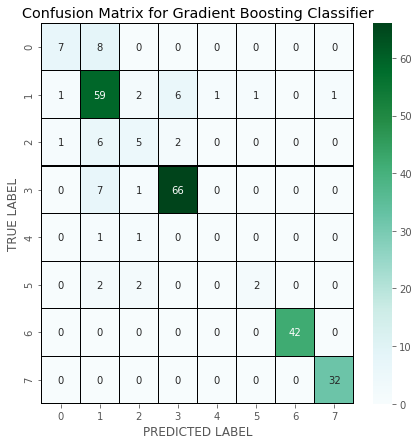

In [222]:
# Lets plot confusion matrix for Gradient Boosting Classifier
cm = confusion_matrix(y_df_test,predGB)

x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.show()

## Checking the Cross Validation Score


In [224]:
#cv score for Logistic Regression
print(cross_val_score(log,x_df,y_df,cv=5).mean())

# cv score for Decision Tree Classifier
print(cross_val_score(dtc,x_df,y_df,cv=5).mean())

# cv score for Random Forest Classifier
print(cross_val_score(rf,x_df,y_df,cv=5).mean())

# cv score for Support Vector  Classifier
print(cross_val_score(svc,x_df,y_df,cv=5).mean())

# cv score for Gradient Boosting Classifier
print(cross_val_score(GB,x_df,y_df,cv=5).mean())

0.6780598555211558
0.7979084967320261
0.8308083935328516
0.727389060887513
0.8260956312349501


We can conclude that Gradient Boosting Classifier as our best fitting model.

### Hyper Parameter Tuning


In [225]:
from sklearn.model_selection import GridSearchCV


In [226]:
# Gradient Boosting Classifier
parameters ={'criterion':['friedman_mse','mse','mae'],
            'max_features':['auto','sqrt','log2'],
            'n_estimators':[0,200],
            'max_depth':[2,3,4,5,6,8]}

In [227]:
GCV = GridSearchCV(GradientBoostingClassifier(),parameters,cv=5)


In [229]:
GCV.fit(x_df_train,y_df_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse', 'mse', 'mae'],
                         'max_depth': [2, 3, 4, 5, 6, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [0, 200]})

In [230]:
GCV.best_params_

{'criterion': 'mae',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 200}

In [254]:
fuel_type =RandomForestClassifier (criterion='gini', max_depth=8, max_features='auto', n_estimators=200)
fuel_type.fit(x_df_train, y_df_train)
pred = fuel_type.predict(x_df_test)
acc=accuracy_score(y_df_test,pred)
print(acc*100)

83.984375


## Plotting ROC and compare AUC for the final model


Since our target variable has multiclassification problem so will use label binarize to convert multi classes into binary classes.


In [239]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier

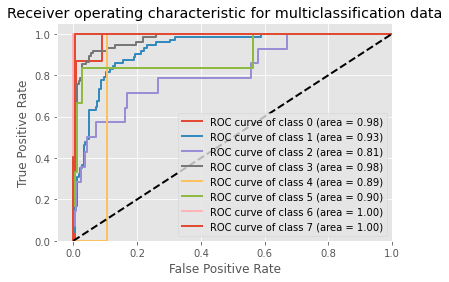

In [240]:
classifier = OneVsRestClassifier(fuel_type)
y_score = classifier.fit(x_df_train, y_df_train).predict_proba(x_df_test)

#Binarize the output
y_df_test_bin  = label_binarize(y_df_test, classes=[0,1,2,3,4,5,6,7])
n_classes = 8

# Compute ROC curve and AUC for all the classes
false_positive_rate = dict()
true_positive_rate = dict()
roc_auc = dict()
for i in range(n_classes):
    false_positive_rate[i], true_positive_rate[i], _ = roc_curve(y_df_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(false_positive_rate[i], true_positive_rate[i])
    
   
for i in range(n_classes):
    plt.plot(false_positive_rate[i], true_positive_rate[i], lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multiclassification data')
plt.legend(loc="lower right")
plt.show()

## Saving the model


In [241]:
import joblib
joblib.dump(fuel_type,"Global_Power_Plant_Fuel_Type.pkl")

['Global_Power_Plant_Fuel_Type.pkl']

Model is being saved

## Conclusion

In [ ]:
The accuracy score for capacity_mw is 82%
The accuracy score for Fuel_Type is 83.9%